In [1]:
import Bio
from statistics import mean
from decimal import Decimal
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
import pydna
from matplotlib.ticker import StrMethodFormatter
from scipy import stats

In [4]:
input_dir = '../analysis/input_files/'

In [5]:
capsid_comp_df = pd.read_csv(input_dir + '20221011_capsid_serotype_comparison_data_for_barplot.csv', header=[0,1],
                            index_col=[0,1,2,3,4,5], skipinitialspace=True)
capsid_comp_df.head()

,,,,,,Replicate 1,Unnamed: 7_level_0,Replicate 2,Unnamed: 9_level_0,Replicate 3,Unnamed: 11_level_0,Average,Unnamed: 13_level_0,Std. Dev.,Unnamed: 15_level_0,Percent CV,Unnamed: 17_level_0,Percent WT Titer,Std. Dev. Norm.
,,,,,Well,Cq,SQ,Cq,SQ,Cq,SQ,Cq,SQ,Cq,SQ,Cq,SQ,Unnamed: 18_level_1,Unnamed: 19_level_1
A03,HEX,rep,Unkn,AAV2,WT,24.627917,316241.791200,24.627242,316389.129500,25.057710,235080.338000,24.770956,289237.086200,0.248336,46901.177590,1.002530,16.215479,100.000000,16.215479
B03,HEX,rep,Unkn,AAV2,N139R,25.528001,169932.577500,25.129656,223694.335900,25.291652,200035.552800,25.316436,197887.488800,0.200326,26945.172130,0.791287,13.616410,68.417052,9.315946
C03,HEX,rep,Unkn,AAV2,H92A,35.090048,231.560911,34.700309,303.015303,34.326716,392.125414,34.705691,308.900543,0.381694,80.443874,1.099803,26.041998,0.106798,0.027812
D03,HEX,rep,Unkn,AAV2,A213V,32.042455,1896.645708,31.646563,2492.466403,31.934189,2043.769853,31.874402,2144.293988,0.204605,310.369782,0.641911,14.474218,0.741362,0.107306
E03,HEX,rep,Unkn,AAV2,K340H,34.982525,249.395285,35.289955,201.723184,35.142511,223.327793,35.138331,224.815420,0.153758,23.870842,0.437578,10.617973,0.077727,0.008253


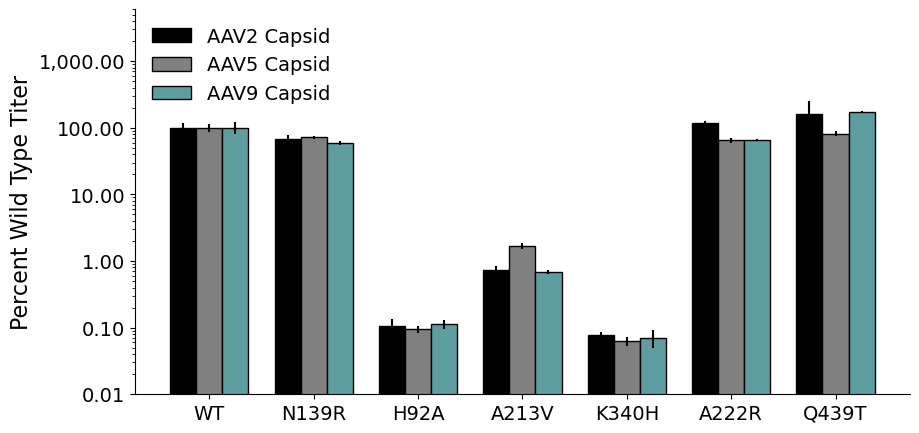

In [7]:
# Plot capsid comparison qPCR data as barplot
capsid_comp_barplot = plt.figure(figsize = (10, 5))
aav2_titers = capsid_comp_df.xs('AAV2', level=4, axis=0)['Percent WT Titer']['Unnamed: 18_level_1']
aav2_std_dev = capsid_comp_df.xs('AAV2', level=4, axis=0)['Std. Dev. Norm.']['Unnamed: 19_level_1']
aav5_titers = capsid_comp_df.xs('AAV5', level=4, axis=0)['Percent WT Titer']['Unnamed: 18_level_1']
aav5_std_dev = capsid_comp_df.xs('AAV5', level=4, axis=0)['Std. Dev. Norm.']['Unnamed: 19_level_1']
aav9_titers = capsid_comp_df.xs('AAV9', level=4, axis=0)['Percent WT Titer']['Unnamed: 18_level_1']
aav9_std_dev = capsid_comp_df.xs('AAV9', level=4, axis=0)['Std. Dev. Norm.']['Unnamed: 19_level_1']
labels = list(capsid_comp_df.xs('AAV2', level=4, axis=0).index.get_level_values(4))

# Set width of bars and positions on x-axis
barWidth = 0.25
br1 = np.arange(len(aav2_titers))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
plt.bar(br1, aav2_titers, yerr=aav2_std_dev, color ='black', width = barWidth, edgecolor ='black', label ='AAV2 Capsid')
plt.bar(br2, aav5_titers, yerr=aav5_std_dev, color ='gray', width = barWidth, edgecolor ='black', label ='AAV5 Capsid')
plt.bar(br3, aav9_titers, yerr=aav9_std_dev, color ='cadetblue', width = barWidth, edgecolor ='black', label ='AAV9 Capsid')
plt.yscale('log')

# Adding Xticks
plt.ylabel('Percent Wild Type Titer', fontsize = 16)
plt.xticks([r + barWidth for r in range(len(aav2_titers))], labels, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim([0.01, 6000])
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # No decimal places
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
 
# plt.legend(bbox_to_anchor=(1.02, 0.6), loc='upper left', borderaxespad=0)
plt.legend(loc='upper left', fontsize=14, frameon=False)
plt.savefig('../analysis/output_figures/20221011_capsid_serotype_comparison_barplot.png')
plt.show()

In [8]:
raav_titers_df = pd.read_csv(input_dir + '20220830_validation_data_repcap_in_trans.csv', header=[0,1],
                            index_col=[0,1,2,3,4,5], skipinitialspace=True)
raav_titers_df.head()

,,,,,,Replicate 1,Unnamed: 7_level_0,Replicate 2,Unnamed: 9_level_0,Replicate 3,Unnamed: 11_level_0,Average,Unnamed: 13_level_0,Std. Dev.,Unnamed: 15_level_0,Unnamed: 16_level_0,Unnamed: 17_level_0
,,,,,Well,Cq,SQ,Cq,SQ,Cq,SQ,Cq,SQ,Cq,SQ,Percent WT Titer,Std. Dev. Norm.
A03,HEX,pNJ16,Unkn,pEK318,WT,21.239692,9.501316e+06,21.133058,1.019505e+07,21.119950,1.028375e+07,21.164234,9.993374e+06,0.065677,4.284366e+05,100.000000,4.287206
H03,HEX,pNJ16,Unkn,pNJ407,S110R,20.425901,1.626877e+07,20.442985,1.608612e+07,20.368175,1.690141e+07,20.412354,1.641877e+07,0.039202,4.278428e+05,164.296553,4.281265
B03,HEX,pNJ16,Unkn,pNJ370,N139R,20.680809,1.374650e+07,20.658862,1.394733e+07,20.322275,1.742196e+07,20.553982,1.503860e+07,0.200964,2.066494e+06,150.485723,20.678645
C03,HEX,pNJ16,Unkn,pNJ372,A213V,24.059855,1.473508e+06,23.778797,1.774273e+06,23.927563,1.608134e+06,23.922071,1.618638e+06,0.140609,1.506576e+05,16.197114,1.507574
D03,HEX,pNJ16,Unkn,pNJ373,A222R,20.661008,1.392757e+07,20.684590,1.371219e+07,20.744185,1.318264e+07,20.696594,1.360747e+07,0.042868,3.833498e+05,136.164888,3.836040


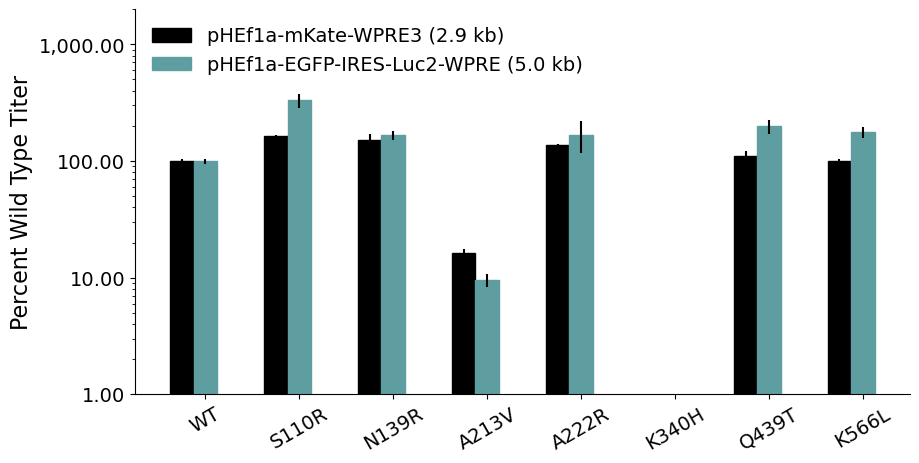

In [9]:
# Plot rAAV qPCR data as barplot
raav_titer_barplot = plt.figure(figsize = (10, 5))
pnj16_titers = raav_titers_df.xs('pNJ16', level=2, axis=0)['Unnamed: 16_level_0']['Percent WT Titer']
pnj16_std_dev = raav_titers_df.xs('pNJ16', level=2, axis=0)['Unnamed: 17_level_0']['Std. Dev. Norm.']
pnj18_titers = raav_titers_df.xs('pNJ18', level=2, axis=0)['Unnamed: 16_level_0']['Percent WT Titer']
pnj18_std_dev = raav_titers_df.xs('pNJ18', level=2, axis=0)['Unnamed: 17_level_0']['Std. Dev. Norm.']
labels = list(raav_titers_df.xs('pNJ16', level=2, axis=0).index.get_level_values(4))

# Set width of bars and positions on x-axis
barWidth = 0.25
br1 = np.arange(len(pnj16_titers))
br2 = [x + barWidth for x in br1]
plt.bar(br1, pnj16_titers, yerr=pnj16_std_dev, color ='black', width = barWidth, edgecolor ='black', label ='pHEf1a-mKate-WPRE3 (2.9 kb)')
plt.bar(br2, pnj18_titers, yerr=pnj18_std_dev, color ='cadetblue', width = barWidth, edgecolor ='cadetblue', label ='pHEf1a-EGFP-IRES-Luc2-WPRE (5.0 kb)')
plt.yscale('log')

# Adding Xticks
plt.ylabel('Percent Wild Type Titer', fontsize = 16)
plt.xticks([r + barWidth for r in range(len(pnj16_titers))], labels, fontsize=14, rotation=30)
plt.yticks(fontsize=14)
plt.ylim([1, 2000])
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # No decimal places
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
 
# plt.legend(bbox_to_anchor=(1.02, 0.6), loc='upper left', borderaxespad=0)
plt.legend(loc='upper left', fontsize=14, frameon=False)
plt.savefig('../analysis/output_figures/20220830_raav_titers.png')
plt.show()

In [10]:
validation_in_cis_df = pd.read_csv(input_dir + '20220405_rep_validation_variants_in_cis.csv', header=[0,1],
                            index_col=[0,1,2,3,4,5], skipinitialspace=True)
validation_in_cis_df.head()

,,,,,,Replicate 1,Unnamed: 7_level_0,Replicate 2,Unnamed: 9_level_0,Replicate 3,Unnamed: 11_level_0,Average,Unnamed: 13_level_0,Std. Dev.,Unnamed: 15_level_0,Percent WT Titer,Std. Dev. Norm.
,,,,,Well,Cq,SQ,Cq,SQ,Cq,SQ,Cq,SQ,Cq,SQ,SQ,SQ
A03,HEX,rep,Unkn,pNJ231,WT,29.866689,2846.596673,30.070004,2448.897833,29.928501,2719.296000,29.955065,2671.596835,0.104228,203.094805,100.000000,7.602000
H06,HEX,rep,Unkn,pNJ248-2,H92A,35.369563,48.466011,36.117728,27.857424,34.887221,69.260425,35.458171,48.527953,0.620020,20.701570,1.816440,0.774876
G06,HEX,rep,Unkn,pNJ246-2,N139G,33.726885,163.483192,33.396697,208.742689,33.657191,172.137731,33.593591,181.454537,0.174039,24.025147,6.791988,0.899280
G03,HEX,rep,Unkn,pNJ237,N139R,28.965714,5545.523868,28.744778,6530.736306,28.921771,5728.859320,28.877421,5935.039831,0.116955,523.969169,222.153274,19.612584
H03,HEX,rep,Unkn,pNJ238,A141R,29.306693,4308.596020,29.307362,4306.462764,29.199478,4664.441529,29.271178,4426.500104,0.062094,206.066079,165.687429,7.713218


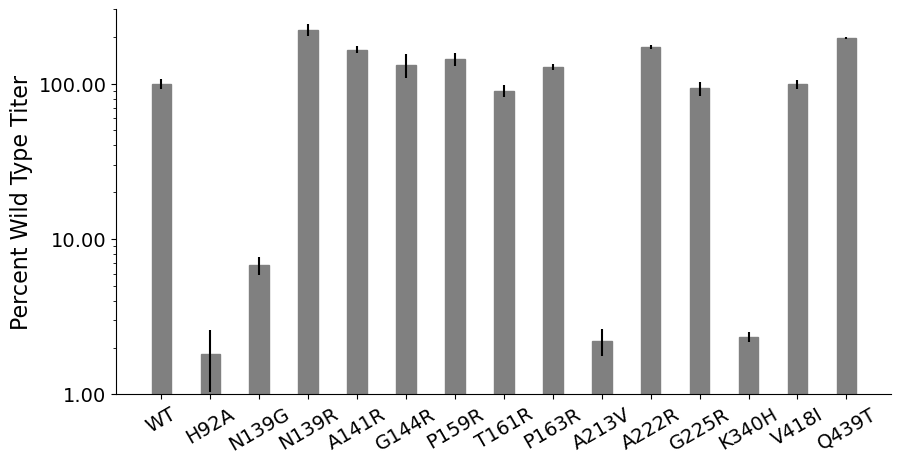

In [11]:
# Plot validation variant in cis data as barplot
validation_in_cis_barplot = plt.figure(figsize = (10, 5))
titers = validation_in_cis_df['Percent WT Titer']['SQ']
std_dev = validation_in_cis_df['Std. Dev. Norm.']['SQ']
labels = list(validation_in_cis_df.index.get_level_values(5))

# Set width of bars and positions on x-axis
barWidth = 0.4
br1 = np.arange(len(titers))
plt.bar(br1, titers, yerr=std_dev, color ='gray', width = barWidth, edgecolor ='grey')
plt.yscale('log')

# Adding Xticks
plt.ylabel('Percent Wild Type Titer', fontsize = 16)
plt.xticks([r for r in range(len(titers))], labels, fontsize=14, rotation=30)
plt.yticks(fontsize=14)
plt.ylim([1, 300])
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # No decimal places
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
 
# plt.legend(bbox_to_anchor=(1.02, 0.6), loc='upper left', borderaxespad=0)
# plt.legend(loc='upper left', fontsize=14)
plt.savefig('../analysis/output_figures/20220405_variants_in_cis.png')
plt.show()

In [12]:
validation_vs_lib_df = pd.read_csv(input_dir + '20220405_validation_vs_library_data.csv', header=[0],
                            index_col=[0,1], skipinitialspace=True)
validation_vs_lib_df.head()

,,Percent WT Titer,Std. Dev. Norm.,Selection Value (Transfection 6)
Sample,aa mut.,,,
pNJ231,WT,100.000000,7.602000,1.000000
pNJ248-2,H92A,1.816440,0.774876,0.456910
pNJ246-2,N139G,6.791988,0.899280,0.695910
pNJ237,N139R,222.153274,19.612584,1.489550
pNJ238,A141R,165.687429,7.713218,2.104868


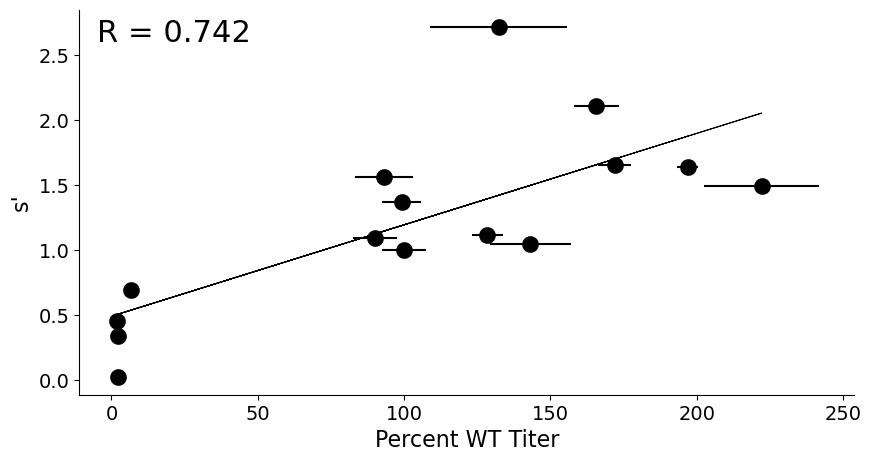

In [13]:
# Generate scatter plot of library selection values vs. validation titers
validation_vs_lib_scatter = plt.figure(figsize=(10,5))
x_values = list(validation_vs_lib_df['Percent WT Titer'])
y_values = list(validation_vs_lib_df['Selection Value (Transfection 6)'])
x_std_dev = list(validation_vs_lib_df['Std. Dev. Norm.'])
plt.scatter(x_values, y_values, c ='black', linewidths = 2, edgecolor ='black', s = 100)
plt.errorbar(x_values, y_values, xerr=x_std_dev, fmt='o', color='black')

plt.ylabel("s'", fontsize = 16)
plt.xlabel('Percent WT Titer', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# calculate equation for trendline
z = np.polyfit(x_values, y_values, 1)
p = np.poly1d(z)

# add trendline to plot
plt.plot(x_values, p(x_values), color='black', linewidth=0.7)

plt.text(-5, 2.6, 'R = 0.742', fontsize=22)

plt.savefig('../analysis/output_figures/20220405_validation_vs_library.png')
plt.show()

In [14]:
conserved_mut_df = pd.read_csv(input_dir + '20220826_conserved_mutations_by_selection_value.csv', header=[0],
                            index_col=[0], skipinitialspace=True)
conserved_mut_df

,total num variants,conserved variants
s',,
1.00,2351,145
1.25,534,20
1.50,115,4
1.75,19,1
2.00,9,0


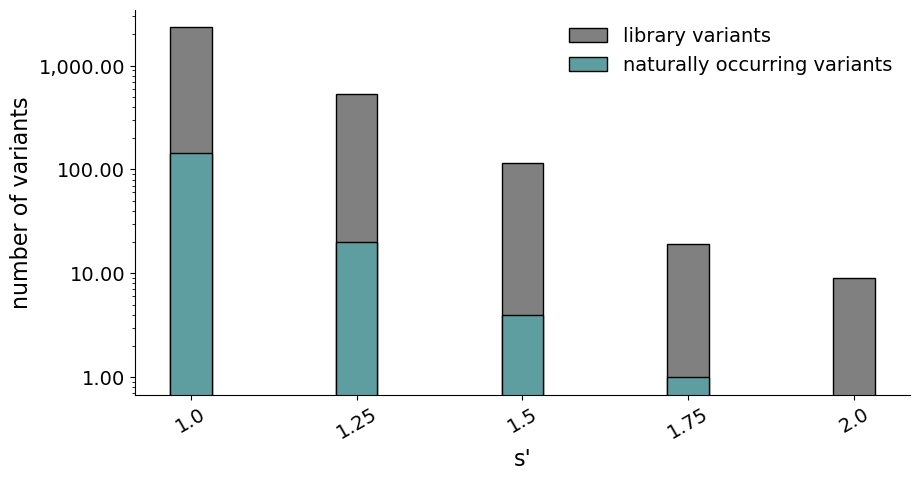

In [15]:
# Plot number of conserved mutations vs. total number of variants binned by selection value
conserved_mut_barplot = plt.figure(figsize = (10, 5))
lib_variants = list(conserved_mut_df['total num variants'])
natural_variants = list(conserved_mut_df['conserved variants'])
labels = list(conserved_mut_df.index.get_level_values(0))
# print (natural_variants)

# Set width of bars and positions on x-axis
barWidth = 0.25
br1 = np.arange(len(lib_variants))
# print (br1)
plt.bar(br1, lib_variants, color ='grey', width = barWidth, edgecolor ='black', label ='library variants')
plt.bar(br1, natural_variants, color ='cadetblue', width = barWidth, edgecolor ='black', label ='naturally occurring variants')
plt.yscale('log')

plt.xlabel("s'", fontsize = 16)
plt.ylabel('number of variants', fontsize = 16)
plt.xticks([r for r in range(len(lib_variants))], labels, fontsize=14, rotation=30)
plt.yticks(fontsize=14)
# plt.ylim([0.01, 6000])
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # No decimal places
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
 
# plt.legend(bbox_to_anchor=(1.02, 0.6), loc='upper left', borderaxespad=0)
plt.legend(fontsize=14, frameon=False)
plt.savefig('../analysis/output_figures/20220826_conserved_vs_library.png')
plt.show()

In [16]:
validation_vs_lib_trans_df = pd.read_csv(input_dir + '20220830_library_vs_validation_in_trans.csv', header=[0],
                            index_col=[0], skipinitialspace=True)
validation_vs_lib_trans_df

,percent wt titer (pNJ16),std. dev.,percent wt titer (pNJ18),std. dev..1,normalized selection value rep78/68 library
aa mutation,,,,,
S110R,164.296553,4.281265,333.024245,46.070931,1.62
N139R,150.485723,20.678645,165.546029,15.577504,1.65
A213V,16.197114,1.507574,9.602796,1.226988,0.30
A222R,136.164888,3.836040,168.125475,51.159622,1.44
K340H,0.014042,0.001669,0.008667,0.002000,0.16
Q439T,109.985237,13.008132,197.778174,28.298270,1.71
K566L,100.345501,4.000944,175.764118,18.363101,1.38


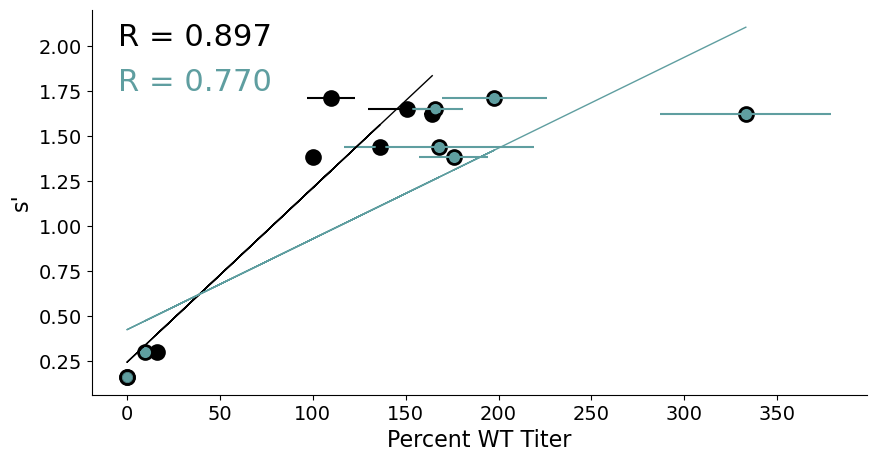

In [17]:
# Generate scatter plot of library selection values vs. validation titers (pRepCap in trans)
validation_vs_lib_trans_scatter = plt.figure(figsize=(10,5))
pnj16_values = list(validation_vs_lib_trans_df['percent wt titer (pNJ16)'])
pnj18_values = list(validation_vs_lib_trans_df['percent wt titer (pNJ18)'])
lib_values = list(validation_vs_lib_trans_df['normalized selection value rep78/68 library'])
pnj16_std_dev = list(validation_vs_lib_trans_df['std. dev.'])
pnj18_std_dev = list(validation_vs_lib_trans_df['std. dev..1'])
plt.scatter(pnj16_values, lib_values, color ='black', linewidths = 2, edgecolor ='black', s = 100)
plt.errorbar(pnj16_values, lib_values, xerr=pnj16_std_dev, fmt='o', color='black')
plt.scatter(pnj18_values, lib_values, color ='cadetblue', linewidths = 2, edgecolor ='black', s = 100)
plt.errorbar(pnj18_values, lib_values, xerr=pnj18_std_dev, fmt='o', color='cadetblue')

plt.ylabel("s'", fontsize = 16)
plt.xlabel('Percent WT Titer', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# calculate equation for trendline
pnj16 = np.polyfit(pnj16_values, lib_values, 1)
p = np.poly1d(pnj16)

pnj18 = np.polyfit(pnj18_values, lib_values, 1)
q = np.poly1d(pnj18)

# add trendline to plot
plt.plot(pnj16_values, p(pnj16_values), color='black', linewidth=1)
plt.plot(pnj18_values, q(pnj18_values), color='cadetblue', linewidth=1)

plt.text(-5, 2, 'R = 0.897', color='black', fontsize=22)
plt.text(-5, 1.75, 'R = 0.770', color='cadetblue', fontsize=22)

plt.savefig('../analysis/output_figures/20220830_validation_vs_library_trans.png')
plt.show()

In [18]:
lib_format_comparison_df = pd.read_csv(input_dir + '20220628_rep7868_vs_wt_aav2_validation.csv', header=[0,1],
                            index_col=[0,1,2,3,4,5,6], skipinitialspace=True)
lib_format_comparison_df

,,,,,,,Replicate 1,Unnamed: 8_level_0,Replicate 2,Unnamed: 10_level_0,Replicate 3,Unnamed: 12_level_0,Average,Unnamed: 14_level_0,Std. Dev.,Unnamed: 16_level_0,Unnamed: 17_level_0,Unnamed: 18_level_0
,,,,,,Well,Cq,SQ,Cq,SQ,Cq,SQ,Cq,SQ,Cq,SQ,Percent WT Titer,Std. Dev. Norm.
A03,HEX,rep,Unkn,pNJ231,AAV2,WT,31.662572,1.819501e+03,31.652741,1.832104e+03,31.655859,1.828098e+03,31.657057,1.826567e+03,0.00502363,6.439373e+00,100.000000,0.352540
A06,HEX,rep,Unkn,pNJ314,AAV2,R113Q,36.017736,8.547297e+01,35.895746,9.311725e+01,36.221733,7.406608e+01,36.045072,8.421877e+01,0.164703371,9.587308e+00,4.610767,0.524881
B06,HEX,rep,Unkn,pNJ315,AAV2,Q207M,32.600009,9.420574e+02,33.135882,6.466374e+02,33.232492,6.042258e+02,32.989461,7.309735e+02,0.340717144,1.840299e+02,40.018975,10.075176
C06,HEX,rep,Unkn,pNJ316,AAV2,P209M,33.424509,5.280112e+02,33.425504,5.276425e+02,33.680557,4.411235e+02,33.510190,4.989257e+02,0.147543311,5.005853e+01,27.314937,2.740579
D06,HEX,rep,Unkn,pNJ318,AAV2,P214I,NaN,0.000000e+00,NaN,0.000000e+00,39.824165,5.902615e+00,39.824165,1.967538e+00,#DIV/0!,3.407876e+00,0.107718,0.186573
F06,HEX,rep,Unkn,pNJ320,AAV2,F333W,36.087719,8.137432e+01,36.271931,7.150085e+01,36.102093,8.055711e+01,36.153914,7.781076e+01,0.10245787,5.479801e+00,4.259945,0.300005
G06,HEX,rep,Unkn,pNJ321,AAV2,N342I,35.339199,1.376421e+02,35.254727,1.460533e+02,35.261745,1.453353e+02,35.285223,1.430103e+02,0.046875501,4.662779e+00,7.829454,0.255276
F09,HEX,rep,Unkn,pNJ160,WT AAV2,WT,19.632669,8.482331e+06,20.312266,5.263440e+06,19.556491,8.948417e+06,19.833809,7.564729e+06,0.416103299,2.006554e+06,100.000000,26.525125
G09,HEX,rep,Unkn,pNJ344,WT AAV2,R113Q,19.918189,6.941365e+06,19.869855,7.180996e+06,20.201016,5.691093e+06,19.996353,6.604485e+06,0.178883361,8.000431e+05,87.306293,10.575964


In [19]:
# Determine signficance of differences between rep78/68 and wt titers
rep7868_r113q = [4.679431337, 5.097936698, 4.054933017]
wt_r113q = [91.75959061, 94.92734022, 75.23194785]
rep7868_q207m = [51.57529097, 35.40178082, 33.07985219]
wt_q207m = [0.506752594, 0.599601218, 0.655016813]
rep7868_p209m = [28.90729427, 28.88710654, 24.15041004]
wt_p209m = [1.96485911, 1.240232474, 7.155132494]
rep7868_p214i = [0, 0, 0.323153423]
wt_p214i = [3.981306011, 1.295912511, 1.218273577]
rep7868_f333w = [4.455041001, 3.914492812, 4.410300603]
wt_f333w = [3.20859667, 2.339210299, 2.201652086]
rep7868_n342i = [7.53556255, 7.996053645, 7.956747165]
wt_n342i = [47.76048825, 28.4186226, 25.27576809]

# check that variances are similar (requirement for validaity of t test)
print(np.var(rep7868_r113q), np.var(wt_r113q))
stats.ttest_ind(a=rep7868_r113q, b=wt_r113q, equal_var=False)

# check that variances are similar (requirement for validaity of t test)
print(np.var(rep7868_q207m), np.var(wt_q207m))
stats.ttest_ind(a=rep7868_q207m, b=wt_q207m, equal_var=False)

# # check that variances are similar (requirement for validaity of t test)
# print(np.var(rep7868_p209m), np.var(wt_p209m))
# stats.ttest_ind(a=rep7868_p209m, b=wt_p209m, equal_var=False)

# # check that variances are similar (requirement for validaity of t test)
# print(np.var(rep7868_p214i), np.var(wt_p214i))
# stats.ttest_ind(a=rep7868_p214i, b=wt_p214i, equal_var=False)

# # check that variances are similar (requirement for validaity of t test)
# print(np.var(rep7868_f333w), np.var(wt_f333w))
# stats.ttest_ind(a=rep7868_f333w, b=wt_f333w, equal_var=False)

# # check that variances are similar (requirement for validaity of t test)
# print(np.var(rep7868_n342i), np.var(wt_n342i))
# stats.ttest_ind(a=rep7868_n342i, b=wt_n342i, equal_var=False)

0.18366684082756804 74.56734371134337
67.67278208885494 0.003741559309286378


Ttest_indResult(statistic=6.778648930443155, pvalue=0.021071111003754115)

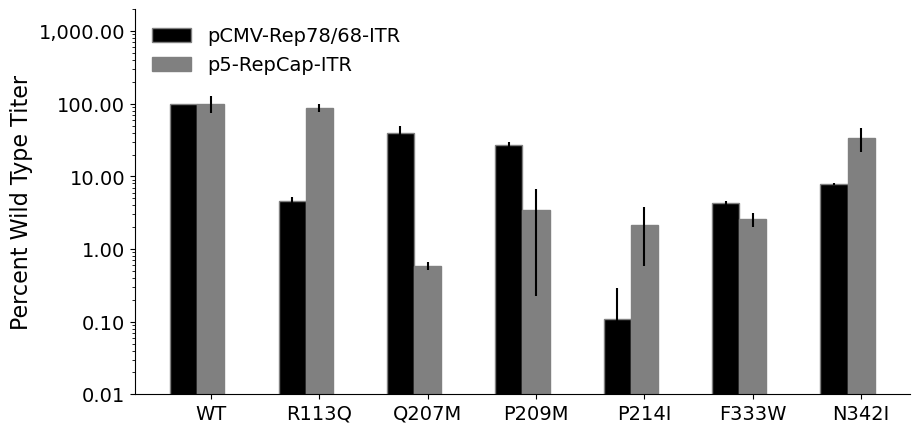

In [20]:
# Plot library comparison qPCR data as barplot
lib_comparison_barplot = plt.figure(figsize = (10, 5))
rep7868_titers = lib_format_comparison_df.xs('AAV2', level=5, axis=0)['Unnamed: 17_level_0']['Percent WT Titer']
rep7868_std_dev = lib_format_comparison_df.xs('AAV2', level=5, axis=0)['Unnamed: 18_level_0']['Std. Dev. Norm.']
wt_titers = lib_format_comparison_df.xs('WT AAV2', level=5, axis=0)['Unnamed: 17_level_0']['Percent WT Titer']
wt_std_dev = lib_format_comparison_df.xs('WT AAV2', level=5, axis=0)['Unnamed: 18_level_0']['Std. Dev. Norm.']
labels = list(lib_format_comparison_df.xs('AAV2', level=5, axis=0).index.get_level_values(5))

# Set width of bars and positions on x-axis
barWidth = 0.25
br1 = np.arange(len(rep7868_titers))
br2 = [x + barWidth for x in br1]
plt.bar(br1, rep7868_titers, yerr=rep7868_std_dev, color ='black', width = barWidth, edgecolor ='grey', label ='pCMV-Rep78/68-ITR')
plt.bar(br2, wt_titers, yerr=wt_std_dev, color ='gray', width = barWidth, edgecolor ='grey', label ='p5-RepCap-ITR')
plt.yscale('log')

# Adding Xticks
plt.ylabel('Percent Wild Type Titer', fontsize = 16)
plt.xticks([r + barWidth for r in range(len(rep7868_titers))], labels, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim([0.01, 2000])
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # No decimal places
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
 
# plt.legend(bbox_to_anchor=(1.02, 0.6), loc='upper left', borderaxespad=0)
plt.legend(loc='upper left', fontsize=14, frameon=False)
plt.savefig('../analysis/output_figures/20220628_rep7868_vs_wt_validation_barplot.png')
plt.show()

In [21]:
affinity_pur_titers_df = pd.read_csv(input_dir + '20220826_capsid_and_vg_titers_affinity_purified_aav.csv', header=[0],
                            index_col=[0,1], skipinitialspace=True)
affinity_pur_titers_df.head()

qPCR titer  qPCR std. dev.   elisa titer  \
aa mutation Sample                                               
WT          A       5.370000e+11     12500000000  3.090000e+12   
            B       3.460000e+11      9420000000  1.490000e+12   
R113Q       A       1.580000e+11      4250000000  1.400000e+12   
            B       1.920000e+11      9560000000  1.680000e+12   
A222R       A       4.780000e+11     12800000000  1.890000e+12   

                    elisa std. dev.  percent full capsids  uncertainty  
aa mutation Sample                                                      
WT          A          5.810000e+10                 17.38         0.52  
            B          7.860000e+10                 23.22         1.38  
R113Q       A          3.520000e+10                 11.29         0.42  
            B          4.930000e+10                 11.43         0.66  
A222R       A          2.560000e+10                 25.29         0.76

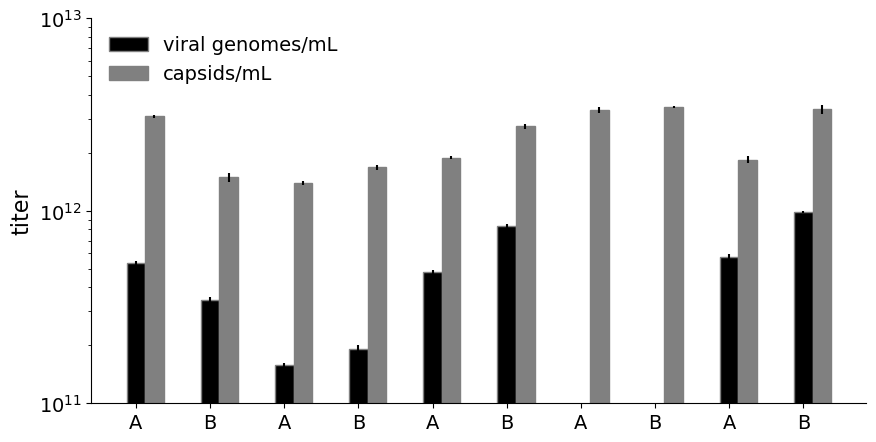

In [22]:
# Plot affinity purified qPCR titers as barplot
affinity_titers_barplot = plt.figure(figsize = (10, 5))
qpcr_titers = affinity_pur_titers_df['qPCR titer']
qpcr_std_dev = affinity_pur_titers_df['qPCR std. dev.']
elisa_titers = affinity_pur_titers_df['elisa titer']
elisa_std_dev = affinity_pur_titers_df['elisa std. dev.']
percent_full = affinity_pur_titers_df['percent full capsids']
percent_full_std_dev = affinity_pur_titers_df['uncertainty']
labels = list(affinity_pur_titers_df.index.get_level_values(1))

# Set width of bars and positions on x-axis
barWidth = 0.25
br1 = np.arange(len(qpcr_titers))
br2 = [x + barWidth for x in br1]
plt.bar(br1, qpcr_titers, yerr=qpcr_std_dev, color ='black', width = barWidth, edgecolor ='grey', label='viral genomes/mL')
plt.bar(br2, elisa_titers, yerr=elisa_std_dev, color ='gray', width = barWidth, edgecolor ='grey', label ='capsids/mL')
plt.yscale('log')

# Adding Xticks
plt.ylabel('titer', fontsize = 16)
plt.xticks([r for r in range(len(qpcr_titers))], labels, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim([100000000000, 10000000000000])
# plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # No decimal places
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
 
# plt.legend(bbox_to_anchor=(1.02, 0.6), loc='upper left', borderaxespad=0)
plt.legend(loc='upper left', fontsize=14, frameon=False)
plt.savefig('../analysis/output_figures/20230124_affinity_purified_titers.png')
plt.show()